<a href="https://colab.research.google.com/github/patjiang/ASICS-noise/blob/master/ODVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASU iGEM- Patrick Jiang

#Input Link and Whether Averaging was present

In [ ]:
def preproc(url, droppump = True, scale = True):
  df = pd.read_csv(url)
  df1 = df['Time -> Value']
  df2 = df1.str.split(" -> ", expand = True)
  df2.columns = ['Time', 'Value']
  df2.dropna(inplace = True)
  averages = []
  timestep = []
  for i in df2['Value'].index:
    if(',' in df2['Value'][i]):
      df2['Value'][i], temp = df2['Value'][i].split(',')
      averages.append(float(temp))
      timestep.append(i)
    elif ('Pump' in df2['Value'][i]):
      df2['Value'][i] = -399
    df2['Value'][i] = float(df2['Value'][i])

  if(droppump):
    df2 = df2.drop(df2[df2['Value'] == -399].index)

  time = list(df2['Value'].index)
  t = [y*1/3600 for y in time]
  t2 = [z*1/3600 for z in timestep]
  consMax = max(df2['Value'])
  avgMax = max(averages)
  if(scale):
    raw = [1023 * x / consMax for x in df2['Value']]
    rawavg = [1023 * x / avgMax for x in averages]
  else:
    raw = [x for x in df2['Value']]
    rawavg = [x for x in averages]

  return t, raw, t2, rawavg

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://docs.google.com/spreadsheets/d/1q1Lk_g-TEu2ejb54riIWE78nBbtTHVfi/export?format=csv' #@param {type:"string"}
averages = True #@param {type:"boolean"}
Label = "9/22" #@param {type:"string"}
drop = True #@param {type:"boolean"}
scale = True #@param {type:"boolean"}


t, raw, t2, rawavg = preproc(url, drop, scale)

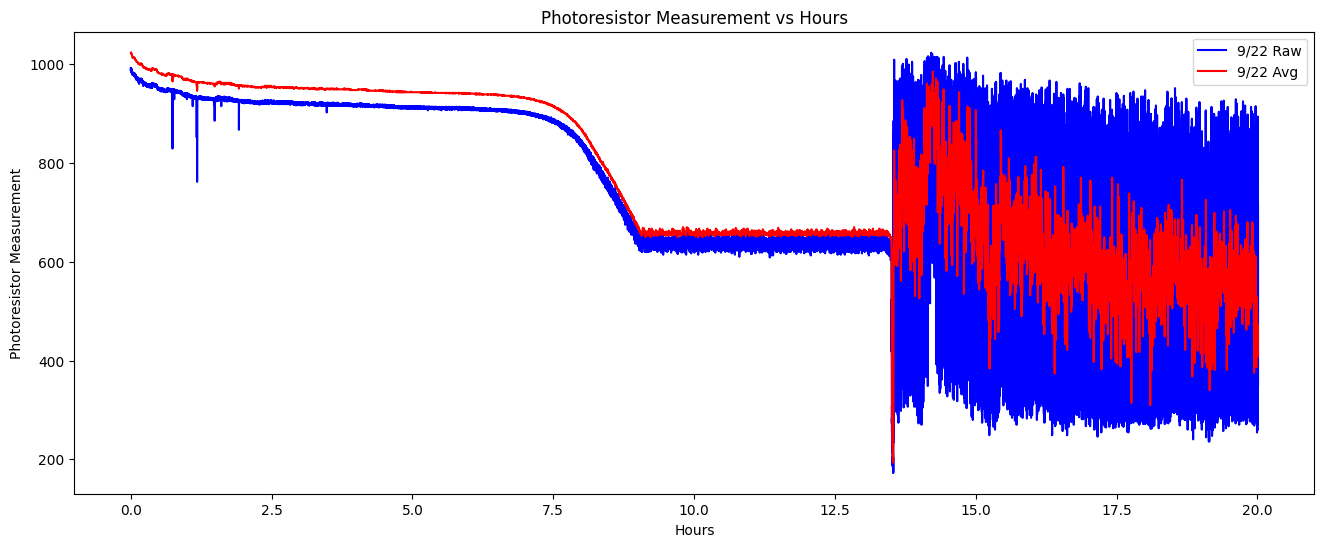

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(t, raw, c = 'blue', label = f"{Label} Raw")
plt.plot(t2, rawavg, c = 'red', label = f"{Label} Avg")

plt.legend(['Photoresistor Measurement', 'Average Photoresistor Measurement'])
plt.title("Photoresistor Measurement vs Hours")
plt.xlabel("Hours")
plt.ylabel("Photoresistor Measurement")
plt.legend()
#plt.xlim(-0.5, 9)
plt.show()

Plot 2 sets of data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = 'https://docs.google.com/spreadsheets/d/1d8sRgeAMGjp7frAosdnGORHZNV90kbp4/export?format=csv' #@param {type:"string"}
averages = True #@param {type:"boolean"}
Label1 = "7/23" #@param {type:"string"}

url2 = 'https://docs.google.com/spreadsheets/d/1KDOlv8f1nVrmrRUPLdsGn-VmQxDkgmdcswwSWkkxGBg/export?format=csv' #@param {type:"string"}
averages2 = True #@param {type:"boolean"}
Label2 = "7/31" #@param {type:"string"}

drop = False #@param {type:"boolean"}
scale = True #@param {type:"boolean"}

if("csv" not in url1):
  url1 = url1 + "/export?format=csv"
if("csv" not in url2):
  url2 = url2 + "/export?format=csv"


t, scaled, t2, scaleavg = preproc(url1, drop, scale)
t3, scaled2, t4, scaleavg2 = preproc(url2, drop, scale)

Plot plots


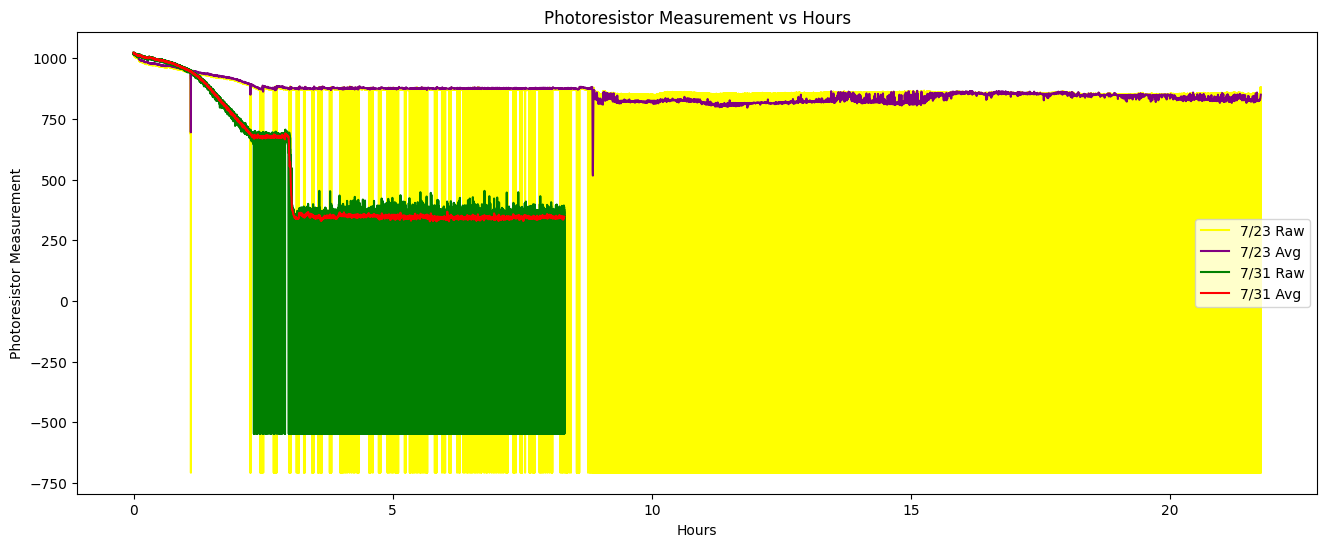

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(t, scaled, c = 'yellow', label = f"{Label1} Raw")
plt.plot(t2, scaleavg, c = 'purple',  label = f"{Label1} Avg")

plt.plot(t3, scaled2, c = 'green', label = f"{Label2} Raw")
plt.plot(t4, scaleavg2, c = 'red', label = f"{Label2} Avg")
plt.legend(['Photoresistor Measurement', 'Average Photoresistor Measurement'])
plt.title("Photoresistor Measurement vs Hours")
plt.xlabel("Hours")
plt.ylabel("Photoresistor Measurement")
plt.legend()
#plt.xlim(18.25, 18.6)
plt.show()